# Machine Learning Engineer Nanodegree
## Project: Predicting article retweets and likes based on the title using Machine Learning

In this notebook is presented the code used to evaluate and test the assumptions of the prediction algorithm. The final report can be fully read on the attached file [final-report.pdf](https://github.com/flaviohenriquecbc/machine-learning-capstone-project/blob/master/final-report.pdf)

*Abstract* - Choosing a good title for an article is an important step in the writing process. The more interesting the article title seems, the higher the chance a reader will interact with the whole content. This project focus on predicting the number of retweets and likes on Twitter from FreeCodeCamp's articles based on its titles. This problem is a classification task using Supervised Learning. With data from FreeCodeCamp on Twitter and Medium, it was used machine learning methods including support vector machines (SVM), decision trees, gaussian naive Bayes (GaussianNB), k-nearest neighbors, logistic regression, gradient boosting and naive Bayes classifier for multinomial models (MultinomialNB) to make the predictions. This study shows that the MultinomialNB model performed better for retweets reaching an accuracy of 60.6%  and logistic regression reached 55.3% for likes.

*Keywords* - prediction, machine learning, social media, title, performance

## Definition

# Project Overview

Social networks websites have become an important communication tool and source of information. The hours spent on average connected per day in the past years is up to 6 hours [1] for adults and 9 for teenagers, while 30% of this time is on social networks [2]. During a normal navigation on such platforms, users are exposed to several posts such as friends' statuses, images, news and more. With such amount of information and variety of content, the time for the user to decide to interact with the content is very small. Gitte at al. [3] suggest that we take around 50 milliseconds to make a good first impression and this has proved to be very powerful in a wide range of contexts.

Besides being a place for connecting with friends and sharing moments of the user's life, a survey has shown that social networks are also used as a source of news and information by 67% of the users [4]. Part of these posts are articles that can be read on an external website. Typically such posts show the title of the article and sometimes a small part of its content and an image.

Considering the offer of content and competition with so many interesting posts, showing a proper title for the post affects the probability that a user will check the content. This measure has a strong impact on how many readers an article will have and how much of the content will be read. Furthermore, showing the user a content they prefer (to interact) increases the user satisfaction. It is thus important to accurately estimate the interaction rate of articles based on its title.

## Related Work

In the literature is possible to find previous studies on the area of classifying the article focused on click-baits title detection [5] [6]. Click-bait headlines normally exploit the curiosity of the reader, proving enough information to make the reader curious, but not enough to fully satisfy the curiosity. In this way, the user is forced to click on the linked content to read the whole article.

Some other studies also investigate this subject using deep learning on cross-domain sentiment analysis [7].

## Problem Statement

When an author writes a text, it is expected that their words will influence and bring value to the readers. While writing, the title is one of the important details that needs to be taken into consideration, because this will normally be the first contact place of their work. Thus, to create a good first impression, to have more people read the article and interact with it, choosing a good title is very important.

Some of the most used platforms to spread ideas nowadays are Twitter and Medium. On the first one, articles are normally posted including external URLs and the title, where users can access and demonstrate satisfaction with like or retweet (share) of the original post. The second one shows the full text with tags to classify the article and claps (similar to Twitter's likes) to show how much the users appreciate the content. A correlation between these two networks can bring us more valuable information.

The problem to be solved is a classification task using supervised learning: *Predict the number of likes and retweets an article receives based on the title*

## Evaluation Metrics

At least one evaluation metric is necessary to quantify the performance of the benchmarks and solution model. For this project, it will be used the accuracy, which is the number of correct predictions made as a ratio of all predictions made.

Accuracy = Number of correct predictions / Total number of predictions made

This metric only works well if there are a similar number of samples belonging to each class. For this reason, we will divide the range of retweets and likes count in a way that respects this distribution.


# Analysis

## Data Exploration

The data used to predict how titles will perform was gathered from the accounts of the non-profit organization FreeCodeCamp on [Medium](https://medium.freecodecamp.org/) and [Twitter](https://twitter.com/freecodecamp). On both social platforms, it was possible to get public information about how the users interacted with the content, using as likes and retweets from Twitter, and claps from Medium.

Correlating the number of likes and retweets from Twitter with a Medium article is an attempt to isolate the effect of the number of reached readers and the number of Medium claps. Because the more the article is shared in different platforms, the more readers it will reach and the more Medium claps it will receive. Using only the Twitter statistic, it is expected that the articles reached initially almost the same number of readers (that are the followers of the FreeCodeCamp account on Twitter), and their performance and interactions are limited to the characteristics of the tweet, for example, the title of the article, that is exactly what we want to measure.

The FreeCodeCamp account was chosen, because the idea is to limit the scope of the subject of the articles and predict better the response on a specif field. The same title can perform well in one category (e.g. Technology), but not necessarily in a different one (e.g. Culinary). Also this account posts as the Tweet content the title of the original article and the URL on Medium.

After getting the articles from FreeCodeCamp written on Medium and shared on Twitter, there is a dataset of 711 data points.

In [271]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

sns.set_style('whitegrid')
sns.set_palette('coolwarm')

import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download()
from nltk.corpus import stopwords

print('Success')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
Success


In [272]:
# Load the FreeCodeCamp Twitter statistics and Medium statistics.
# Read imported data
title_stat = pd.read_json("dataset/dataset-tweets-final.json")
print("Title statistic data read successfully!")

Title statistic data read successfully!


In [273]:
# clean the title
def clean_text(text):
    # remove wrong convertion characters from title
    text = text.map(lambda x: re.sub(r'\\x[00-ff]{2}','',str(x)))
    text = text.str.strip()
    text = text.map(lambda x: re.sub('b"','',str(x)))
    return text

In [274]:
#remove duplicates
title_stat = title_stat.drop_duplicates(subset=['text'], keep=False)
# Remove some columns to print
title_stat = title_stat.drop(['id', 'created_at', 'url'], axis=1)
#
title_stat['text'] = clean_text(title_stat['text'])
# calculate length of the titles
title_stat['text_lenght'] = title_stat['text'].str.len()
# reorder the columns
title_stat = title_stat[title_stat.columns[[4, 0, 3, 2, 5, 1]]]
# rename the columns
temp = title_stat.rename(index=str, columns={"favorite_count": "Likes (Twitter)", "medium_categories": "Categories (Medium)", "medium_claps": "Claps (Medium)", "retweet_count": "Retweet (Twitter)", "text": "Title (Twitter)", "text_lenght": "Title Length"})
title_stat = title_stat.rename(index=str, columns={"favorite_count": "Likes", "medium_categories": "Categories", "medium_claps": "Claps", "retweet_count": "Retweet", "text": "Title", "text_lenght": "Title Length"})
# limit the total number of lines to print
temp.head()

,Title (Twitter),Likes (Twitter),Retweet (Twitter),Claps (Medium),Title Length,Categories (Medium)
0,How to use JSON padding (and other options) to...,10,5,177,76,"[JavaScript, HTML, Web Development, Tutorial, ..."
1,How to build GitHub search functionality in Re...,19,7,61,90,"[React, Tech, Functional Programming, Programm..."
2,How to read and write Mindful Minutes from iOS...,11,6,54,81,"[iOS, Software Development, Programming, Web D..."
3,"How to make more money on Upwork, by @jpmorris",39,9,139,46,"[Freelancing, Tech, Web Development, Web Desig..."
4,Let's build a fun little game: Learn advanced ...,62,14,342,116,"[CSS, Games, Tech, Programming, React]"


### Exploratory Visualization

This section will explore the data visualization of the existing dataset and analyze the possible metrics that will be used to understand the solution. We will identify the relationship between each one of the features with the overall performance of the article. Within the following steps we will discuss:

* General statistic overview of the dataset
* Distribution of retweets, claps and favorites
* Relation of the title length with the performance of the article
* Relation of the article's categories with the performance of the article
* Relation of the article's words with the performance of the article
* Try to identify the relation between the features

#### Overall Statistics

We will analyze here the high-level statistics of the articles. Try to understand how many times the articles were on average retweeted, clapped or liked. Also, understand the average length and number of words of the title.

In [275]:
# calculate length of the titles
title_stat['Title Length'] = title_stat['Title'].str.len()
title_stat.describe()

,Likes,Retweet,Claps,Title Length
count,711.000000,711.000000,711.000000,711.000000
mean,49.291139,16.438819,285.263010,77.136428
std,45.234113,15.685065,273.451934,20.213779
min,0.000000,0.000000,1.000000,21.000000
25%,20.000000,6.500000,7.500000,62.000000
50%,34.000000,11.000000,238.000000,76.000000
75%,63.500000,20.000000,471.500000,93.000000
max,298.000000,125.000000,997.000000,117.000000


From this statistic is possible to understand the order of magnitude of our dataset. Articles normally are retweeted and likes around tens of times and clapped hundreds of times. It is possible to check the maximum values from all the three variables, retweet and like hundreds and clap thousand of times. From these numbers, we can define what is expected from our articles and the interaction with them. The length of the text goes from 21 to 146 characters, as expected, for a tweet content.

#### Histogram and Box plots

In this section we will check how the multiple features are distributed.

Total Retweet: 11688 times
Total Likes: 35046 times
Total Claps: 202822 times


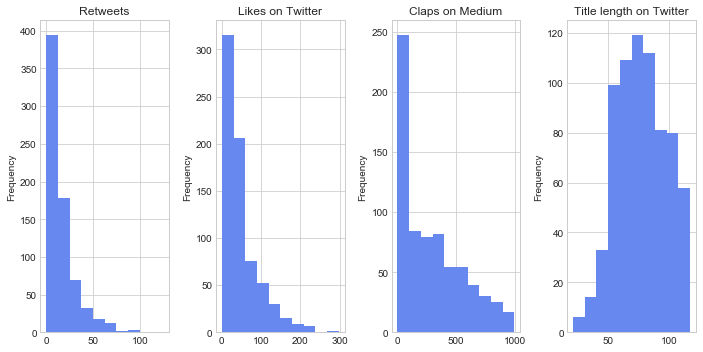

In [276]:
title_length = 'Title Length'
# set the columns that will show statistic and graph
columns = [{'column_name': 'Retweet', 'column_text': 'Retweets'},
           {'column_name': 'Likes', 'column_text': 'Likes on Twitter'},
           {'column_name': 'Claps', 'column_text': 'Claps on Medium'},
           {'column_name': title_length, 'column_text': 'Title length on Twitter'}] 

# plot histogram of columns
plt.figure(figsize=(10, 5))
for el in columns:
    class_name = el['column_name']
    column = title_stat[class_name]
    plt.subplot(1, 4, columns.index(el) + 1)
    plt.tight_layout()
    column.plot.hist(orientation='vertical', cumulative=False, title=el['column_text'])
    if class_name != title_length:
        print('Total {}: {} times'.format(class_name, column.sum()))

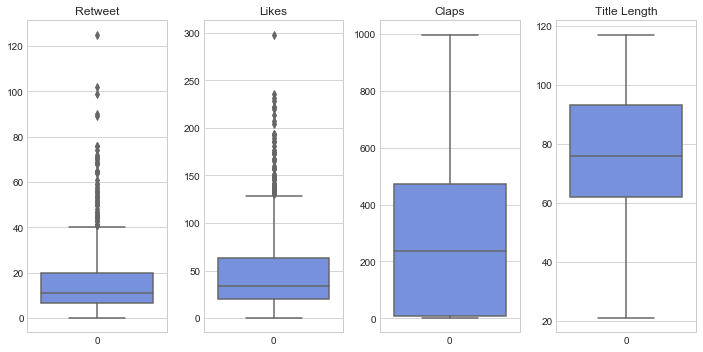

In [277]:
# plot boxplots
plt.figure(figsize=(10, 5))      
for el in columns:
    class_name = el['column_name']
    column = title_stat[class_name]
    plt.subplot(1, 4, columns.index(el) + 1)
    plt.tight_layout()
    plt.title(class_name);
    sns.boxplot(data=column);

From these histograms, together with the overall statistic and the box plots, we can notice that we have a Gaussian distribution for the text length and the average length is around 80 characters. Like, retweet and claps are positive-skewed, i.e. they are concentrated on the left part of the graph, meaning that a small part of the articles will over-perform about readers' interaction and the biggest part of them will generate less interaction.

#### Scatter Matrix

Here we try to find a relationship between the multiple features that we gathered from Twitter and Medium.

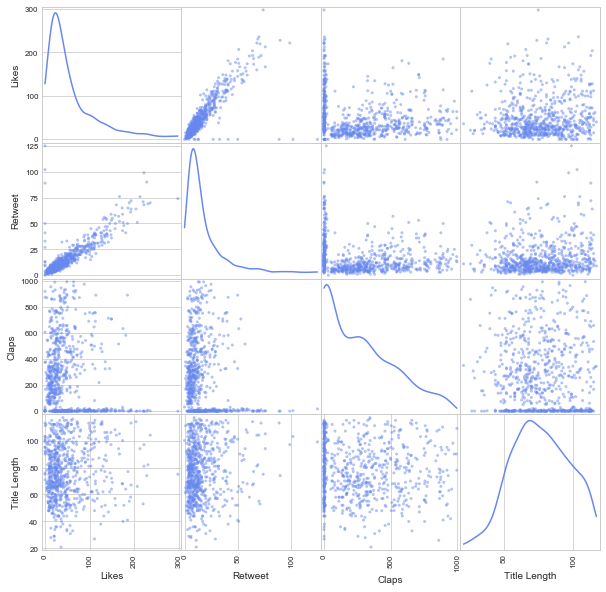

In [278]:
temp = pd.plotting.scatter_matrix(title_stat, diagonal="kde", figsize=(10, 10))

We can notice for the image about, we can notice a clear relationship between the number of retweets and likes. They are directed connected, it means, the more retweets, the more likes the article will receive and vice versa.

#### Title length that performed better

Here we analyze the relationship between the length of the title with its performance. For this experiment, we just considered the 25% top performers of each feature.

In [279]:
# function to plot the top performers
PERCENTAGE = 25

In [280]:
# remove the outlier data ponts. We use the forumla:
# Outlier < Q_1 - 1.5* IQR
# Outlier > Q_3 + 1.5 * IQR
# Where Q_1 and Q_3 are the first and third quartile
# and IQR is the Interquartile Range (IQR = Q_3 - Q_1).
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    non_outliers = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
#     non_outliers = df[column] >= 0
    return df.loc[non_outliers]

In [281]:
# plot relation between the number of retweet/favorite/claps and the title length or words in title
def plot_top_length_performers(col_name, is_grouped):
    plt.figure(figsize=(10, 5))      
    for el in columns:
        class_name = el['column_name']
        column = title_stat[class_name]
        if class_name != title_length:
            plt.subplot(1, 3, columns.index(el) + 1)
            plt.tight_layout()
            # remove outliers
            title_stat_top = remove_outliers(title_stat, class_name)
            # get top PERCENTAGE%
            title_stat_top = title_stat_top.sort_values(by=[class_name], ascending=False).head(int(len(title_stat)*(PERCENTAGE/100.00)))
            if (is_grouped):
                temp = title_stat_top.groupby(pd.cut(title_stat_top[col_name], bins=np.arange(0, 140+10, step=10))).count()[class_name]
            else:
                temp = title_stat_top.groupby(title_stat_top[col_name]).count()[class_name]
            temp.plot.bar()
            #sns.despine()
            plt.title('{} frequency'.format(el['column_name']));

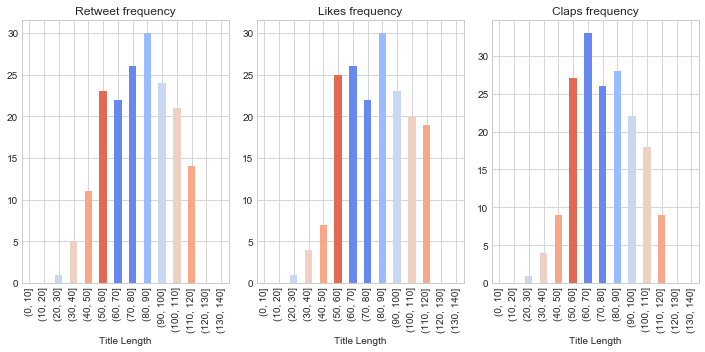

In [282]:
plot_top_length_performers(title_length, True)

To avoid being biased by outliers, we removed for each feature (likes, retweets and claps) analysis the data points that don't fit the following formulas:

Outlier < Q_1 - 1.5* IQR

Outlier > Q_3 + 1.5 * IQR

Where Q_1 and Q_3 are the first and third quartile and IQR is the Interquartile Range (IQR = Q_3 - Q_1). 

We can notice from these graphics that titles longer than 50 and smaller than 120 characters (110 for Medium) perform better than others.

After analyzing the title length and didn't reach any conclusion, we decided to investigate the number of words in the title.

#### Number of words in the title that performed better

From this second experience showed on image bellow, we reached the conclusion that the best number of words in the title is from 9 to 17 words. To optimize the number of retweets and likes something from 9 to 18, and for claps from 7 to 17 words.

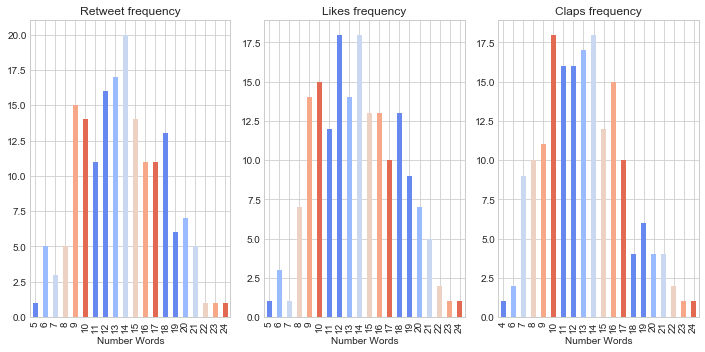

In [283]:
number_words = 'Number Words'
title_stat[number_words] = title_stat['Title'].str.split().apply(len)
plot_top_length_performers(number_words, False)

#### Categories that performed better

Here we filtered the dataset and just analyzed the top 25% performers for each one of the features. We wanted to have a clear overview of how the categories perform compared between them. The outliers were removed.

In [284]:
# plot relation between the words used on medium title and the number of retweet/favorite/claps. Just for the top PERCENTAGE% performers
def plot_top_performers(lst_col):
    for el in columns:
        column = title_stat[el['column_name']]
        class_name = el['column_name']
        if class_name != title_length:
            plt.figure(figsize=(10, 5))
            # remove outliers
            title_stat_top = remove_outliers(title_stat, class_name)
            title_stat_top = title_stat_top.sort_values(by=[class_name], ascending=False).head(int(len(title_stat_top)*(PERCENTAGE/100.00)))
            x = pd.DataFrame({
                    col:np.repeat(title_stat_top[col].values, title_stat_top[lst_col].str.len())
                    for col in title_stat_top.columns.difference([lst_col])
                }).assign(**{lst_col:np.concatenate(title_stat_top[lst_col].values)})[title_stat_top.columns.tolist()]
            temp = x.groupby(lst_col).count()[class_name].sort_values(ascending=False).head(20).sort_values(ascending=True)
            temp.plot.barh()
            #sns.despine()
            plt.title('Most used {} on top {}% {}'.format(lst_col, PERCENTAGE, el['column_text']));

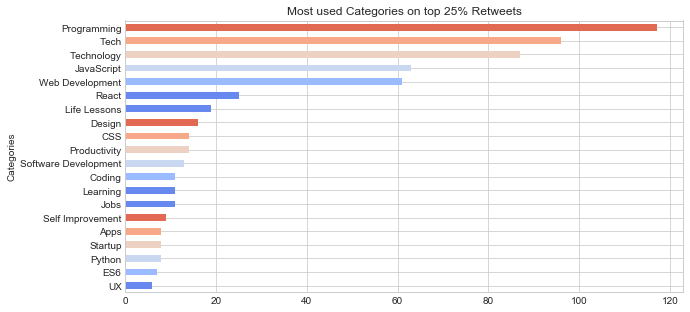

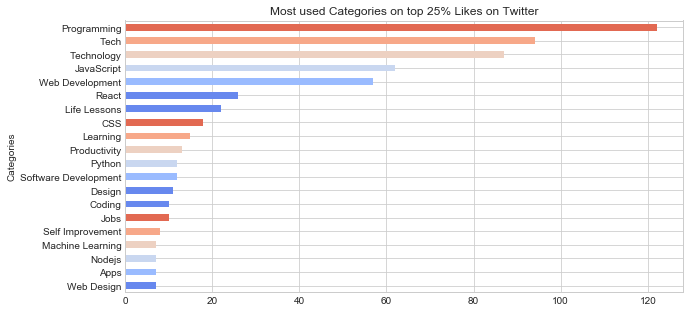

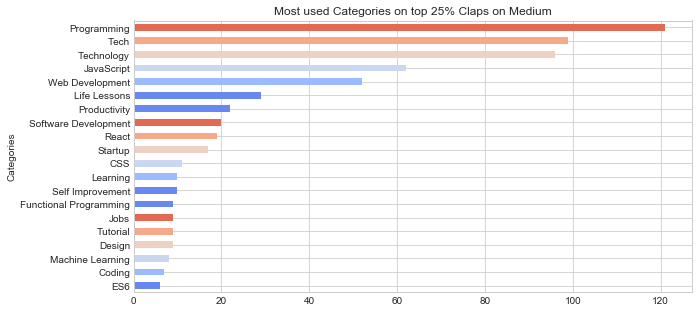

In [285]:
# plot relation between the tag used on medium (tag) and the number of retweet/favorite/claps
plot_top_performers('Categories')

From this statistic, we notice that articles created with the following categories can increase the number of retweets, likes and claps: "Programming", "Tech", "Technology", "JavaScript" and "Web Development".



#### Words that performed better

We repeated the same strategy of limiting the 25% performers for the words on the title of the article. We wanted to understand if there are words that can boost the interaction from the readers. The outliers were removed.

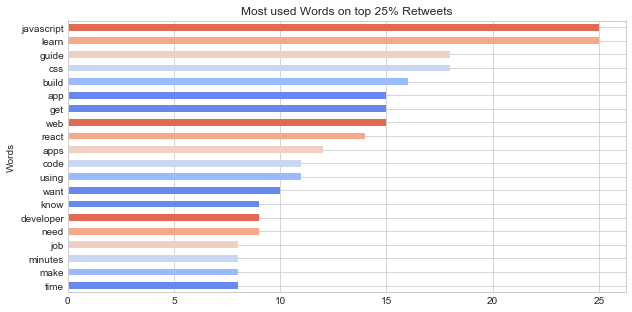

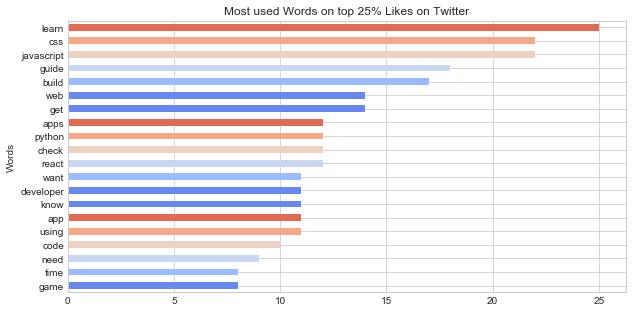

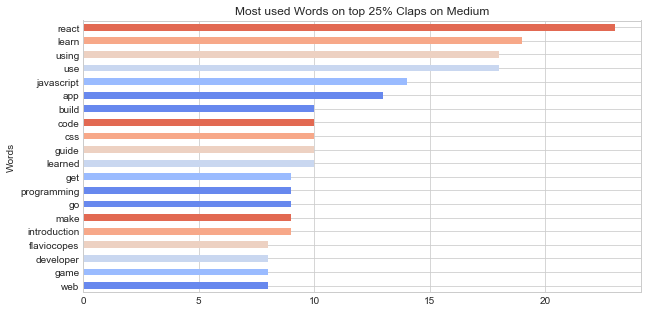

In [286]:
# create a column containing the words of the title
# remove special characters
temp = title_stat['Title'].str.lower().str.translate(str.maketrans('','','()!@#$:"?,./+')).str.split()
# temp = title_stat['Title'].str.lower().str.split()
# remove common words (it, a, the, ...)
stop=set(stopwords.words('english'))
title_stat['Words'] = temp.apply(lambda x: [item for item in x if item not in stop and not '\\' in item])
# title_stat['Words'] = temp
# print(stop) #uncomment to see removed words
# plot relation between the words used on medium title and the number of retweet/favorite/claps. Just for the top PERCENTAGE% performers
#sns.despine()
plot_top_performers('Words')

In this lexical analysis, we can notice that some words get much more attention on the FreeCodeCamp community than others. If the intention is to make the articles reach further in numbers, talking about JavaScript, React or CSS will increase this change. Using the words "learn" or "guide" to describe will also make the probability higher.

### Algorithms and Techniques

Classification is a common task of machine learning (ML), which involves predicting a target variable taking into consideration the previous data. To reach such classification, it is necessary to create a model with the previous training data, and then use it to predict the value of the test data. This process is called supervised learning, since the data processing phase is guided toward the class variable while building the model.

Predicting the number of retweets and likes of an article can be treated as a classification problem, because the output will be discrete values (range of numbers). As input, the title of the articles with each word as a token (t1, t2, t3, … tn), the title length and the number of words in the title.

For this task, we evaluated the following algorithms:

*Support vector machine (SVM)*: SVM contructs a hyperplane (or a set) that can separate the points in the defined labels. The distance between the closest data points and the hyperplan is named margin. An ideal separation is defined by a hyperplan that has the largest distance to the closest points of any class, so the challenge is to find the coefficients that maximize this margin. Only these closest data points are relevant to identify (or to support the definition of) the hyperplane, and they are named vectors. SVM performs linear classifications, but also can efficiently perform non-linear, for this is necessary use a *kernel trick*, mapping their inputs into a high-dimensional feature spaces. 

This model was chosen, because it works well then big quantity of features and relatively small quantity of data and to deal well with linear and non-linear datasets. And due the fact we have more samples than number of features, it can generate a good prediction.

*Decision trees*: This model uses a decision tree to classifies the dataset into smaller subsets, and to define a conclusion about a target value. The tree consists of leaves, where the intermediate ones are the decision nodes and the ones from the extremes are the final outcomes.

This model was chosen, because it can be easily interpreted, visualized and explained. Also due the fact that this model implicitly perform variable screening or feature selection.

*Gaussian naive Bayes (GaussianNB)*: This model is a classification technique based on the Bayes' Theorem. It assumes the independence among the involved features. Nevertheless, this approach performers well even on data that are dependent between them. This algorithm was created by Bayes to prove the existence of God. It relies on the probability of an event, based on prior knowledge of conditions that might be related to the event.

This model was chosen, because this family of algorithms can predict well with small set of data and when there is a large number of features comparatively.

*K-nearest neighbors (KNN)*: This algorithm takes in consideration the k closest points (neighbors) around the target and use them learn how to classify the desired point. 

This model was chosen, because its simple to implement, no assumption about the data is necessary and the non-parametric nature of KNN gives an advantage in certain settings where the data may be highly unusual.

*Logistic regression*: This model is named after the core statistical function that it is based on, the logistic function. The Logistic regression estimates the parameters of this function (coefficients), and as result it predicts the probability of presence of the characteristic of interest.

This model was chosen, because provides probabilities for outcomes and a convenient probability scores for observations.

*Naive Bayes classifier for multinomial models (MultinomialNB)*: This model is similar to the Gaussian naive Bayer, but the difference is that it was a multinomial distribution of the dataset, instead of a gaussian one.

This model was chosen, because it works well for data which can easily be turned into counts, such as word counts in text. However, in practice, fractional counts such as TF-IDF may also work.

In the end, it was selected those with the best accuracy. To estimate it, it was used a 5-fold cross validation that splits the dataset in 5 parts, 4 of training and 1 of testing. The implementation of this project was made using Python, Numpy and Scikit.

### Benchmark

This project run the same testing and training data for multiple algorithms, the comparison between them was used to evaluate the overall performance. The overall benchmark was made comparing our data with the logistic regression results.



## Methodology

## Data Preprocessing

### Data cleaning

The first part of the data processing was to clean the dataset. After downloading the tweets, we removed the ones that didn't have any URL (that points to the Medium article) or title. Data points with values of likes, claps or retweets that were not positive numbers or zero were also excluded. 

Words that were Twitter users were replaced by the character '@' (that could be used on the statistics) and words that were wrong non ASCII characters were also removed.

Some of the data points have the same URL, it means, that they shared more than once on the account of Twitter. After analyzing each one of the duplicates, we noticed that there were two types of retweets: same URL and same title; and same URL and a different title. We removed the ones of the first type. For the second type, we left, because the titles were completely rewritten and it can be considered as one different data point.

For the remaining data points, we removed the ones that are considered outliers. We reached the numbers: retweet and likes have 711 items (658 without outliers) each; claps has the same number with or without outliers, 711.

### Assigning classes to the dataset

For this project, we decided to classify the number of retweets and likes in ranges. We wanted to make use of the properties of the Classification family of the Supervised Learning algorithms.

To avoid the Class Imbalance Problem, we divided the dataset into similar groups, as shown in image bellow.

In [287]:
def get_category_name(column_name):
    return '{} Category'.format(column_name)

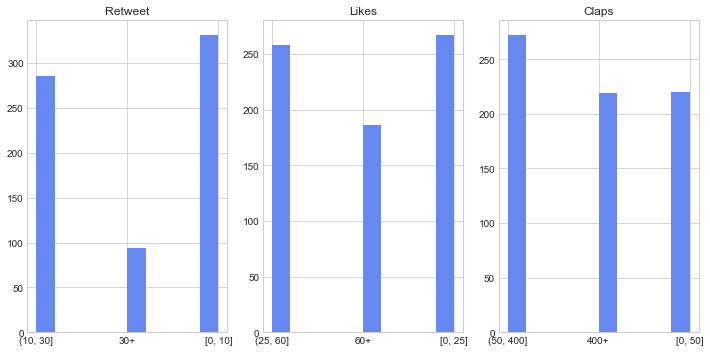

In [288]:
def get_range(value, ranges):
    for idx,max_value in enumerate(ranges):
        if value <= max_value:
            previous = '({}'.format(ranges[idx-1]) if idx >= 1 else '[0'
            return '{}, {}]'.format(previous, max_value)
    return '{}+'.format(ranges[-1])

# plot histogram of columns
plt.figure(figsize=(10, 5))
for el in columns:
    class_name = el['column_name']
    if class_name != title_length:
        column = title_stat[class_name]
        plt.subplot(1, 3, columns.index(el) + 1)
        plt.tight_layout()
        ranges = {
            'Retweet': [10, 30],
            'Likes': [25, 60],
            'Claps': [50, 400]
        }
        column = [ get_range(a, ranges[class_name]) for a in column ]
        plt.title('{}'.format(class_name))
        pd.DataFrame(column)[0].hist(xrot=0)
        
        # add classification to dataframe
        title_stat[get_category_name(class_name)] = column

The defined ranges for our features are:

* Retweets: 0-10, 10-30, 30+
* Likes: 0-25, 25-60, 60+
* Claps: 0-50, 50-400, 400+

Where the range "x-y", means bigger than x and less equal than y. The first range item of each feature also contains the zero on the range.

### Bag of words

To be possible to analyze the title in each data point, we need to map each word into a number. This is necessary because machine learning models normally don't process raw text, but numerical values. To reach this, we used a bag of words model [11]. In this model, it is taken into consideration the presence and often the frequency of words, but the order or position is ignored.

For the calculation of the bag of words, we will use a measure called Term Frequency, Inverse Document Frequency (TF-IDF) [12]. The goal is to limit the impact of tokens (words) that occur very frequently.

At this step, we processed the collection of documents and built a vocabulary with the known words. We reached a vocabulary of 1356 words for retweets, 1399 words for likes and 1430 words for claps.

## Implementation

### Training and Testing Data Split

Before starting the training and the evaluation of the models, we split the dataset into test and training sets. Retweets and likes have a total of 658 data points each, with 526 (80% approximately) as training and 132 as testing points. Claps has 711 data points, with 568 (80% approximately) as training and 143 as testing points.



In [289]:
# clean the title
def clean_title(text):
    # remove twitter users, leave @ for stats reason
    text = text.map(lambda x: re.sub('@[_A-Za-z0-9]+','@',str(x)))
    return text


def split_data(title_stat, class_name, is_remove_outlier, is_clean_text):
            # remove outliers
            if is_remove_outlier:
                title_stat_top = remove_outliers(title_stat, class_name)
            else:
                title_stat_top = title_stat
                
            # Set the number of testing points
            if is_clean_text:
                X_all = clean_title(title_stat_top['Title'])
            else:
                X_all = title_stat_top['Title']
            y_all = title_stat_top[get_category_name(class_name)]

            # Shuffle and split the dataset into the number of training and testing points above
            X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=ratios[class_name], shuffle=False)
        
            return {
                'title_stat_top': title_stat_top,
                'X_all': X_all,
                'y_all': y_all,
                'X_train': X_train,
                'X_test': X_test,
                'y_train': y_train,
                'y_test': y_test
            }

In [290]:
X_all = {}
y_all = {}
X_train = {}
X_test = {}
y_train = {}
y_test = {}

ratios = {
    'Retweet': 0.2,
    'Likes': 0.2,
    'Claps': 0.2
}

for el in columns:
    column = title_stat[el['column_name']]
    class_name = el['column_name']
    if class_name != title_length:
        values = split_data(title_stat, class_name, True, True)
        title_stat_top, X_all[class_name], y_all[class_name], X_train[class_name], X_test[class_name], y_train[class_name], y_test[class_name] = [values[k] for k in ('title_stat_top', 'X_all','y_all', 'X_train', 'X_test', 'y_train', 'y_test')]
        
        total = title_stat[class_name].count()
        total_no_outliers = title_stat_top[class_name].count()
        print('{}\nTotal: {} items.\nTotal without outliers: {}'.format(class_name, total, total_no_outliers))
        
        # Show the results of the split
        print("Training set has {} samples".format(X_train[class_name].shape[0]))
        print("Testing set has {} samples\n".format(X_test[class_name].shape[0]))

Retweet
Total: 711 items.
Total without outliers: 658
Training set has 526 samples
Testing set has 132 samples

Likes
Total: 711 items.
Total without outliers: 658
Training set has 526 samples
Testing set has 132 samples

Claps
Total: 711 items.
Total without outliers: 711
Training set has 568 samples
Testing set has 143 samples



### Training and Evaluating Models

For evaluating the model and perform the prediction, it was chosen to start with the models: support vector machines (SVM), decision trees, gaussian naive Bayes (GaussianNB), k-nearest neighbors and logistic regression. 

During the implementation tests, we noticed that these models were not satisfying what we expected, so we also trained and predicted using a naive Bayes classifier for multinomial models (MultinomialNB) and gradient boosting for classification.

The classification process followed the steps:

* Load the data (title, likes, retweets and claps count)
* Clean the title removing not desired words
* Filter the outliers from the dataset
* Classify the features in ranges
* Divide the dataset in training and test
* Create a bag of words using TF-IDF for the titles
* Train the model and calculate the accuracy

### Model Performance Metrics

We separated the dataset into learning and validation set. A validation set is important to reduce the risk of over-fitting of the chosen model. To avoid discarding relevant data points, we used a cross-validation strategy.

Cross-validation splits the training dataset in k folds, being k - 1 folders used to train the model and the last one to test it. This strategy will repeat multiple times and the overall performance is the average of the computed values.

To estimate the model's accuracy, we used a 5-fold cross validation that split the dataset into 5 parts, 4 of training and 1 of testing.

In [291]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import FunctionTransformer

# implement bag of words with td-idf
X_train_word_features = {}
test_features = {}

def get_text_length(x):
    return np.array([len(t) for t in x]).reshape(-1, 1)

def get_words_length(x):
    return np.array([len(t.split()) for t in x]).reshape(-1, 1)

def to_array(x):
    return x.toarray()

In [292]:
# load classifiers
# Initialize the models
# for each classifier was defined (code bellow: Best features) the best parameters for each feature
# if the best parameters calculated for the model is the same as default, i will mark as #DEFAULT
classifiers = [
    # no parameter to test for the model GaussianNB()
    {
        'classifier': GaussianNB(),
        'toarray': True,
        'parameters': {}
    },
    {
        'classifier': LogisticRegression(),
        'toarray': False,
        'parameters': {
            'C': [0.1, 0.5, 1, 2, 10],
            'fit_intercept': [True, False],
            'class_weight': ['balanced', None],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
            'max_iter': [10, 100, 300]
        }
    },
    {
        'classifier': DecisionTreeClassifier(),
        'toarray': False,
        'parameters': {
            'splitter': ['random', 'best'],
            'max_depth': [1, 5, 10, 20, None],
            'class_weight': ['balanced', None]
        }
    },
    {
        'classifier': SVC(),
        'toarray': True,
        'parameters': {
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'degree':[1, 2, 3, 4, 5, 6, 7],
            'C':[0.5, 1, 2],
        }
    },
    {
        'classifier': KNeighborsClassifier(),
        'toarray': False,
        'parameters': {
            'n_neighbors': [1, 5, 10, 15, 20, 30], 
            'weights': ['distance', 'uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10, 30, 50],
        }
    },
    {
        'classifier': MultinomialNB(),
        'toarray': False,
        'parameters': {
                'alpha': [0, 0.5, 1],
                'fit_prior': [True, False]
        }
    },
    {
        'classifier': GradientBoostingClassifier(),
        'toarray': False,
        'parameters': {
            'learning_rate': [0.1, 0.5, 1.0],
            'loss': ['deviance'],
            'max_depth': [3, 5, 10],
            'max_features': [None],
            'min_samples_leaf': [1, 2],
            'min_samples_split': [0.1, 0.5, 1.0],
            'min_weight_fraction_leaf': [0.0],
            'n_estimators': [50, 100],
            'random_state': [0, None],
            'subsample': [1.0],
            'warm_start': [False]
        }
    }
]

In [293]:
from sklearn.metrics import accuracy_score

def get_score_pipeline(classifier_algo, X_train, y_train):
    classifier = Pipeline([
        ('features', FeatureUnion([
            ('text', Pipeline([
                ('vectorizer', TfidfVectorizer(#TfidfVectorizer#CountVectorizer
                                    stop_words='english',
                                    strip_accents='unicode',
                                    token_pattern=r'\w{1,}',
                                    analyzer='word',
                                    ngram_range=(1, 1),
                                )),
                ('toarray', Pipeline([
                    ('count', FunctionTransformer(to_array, validate=False)),
                ]))
            ])),
            ('length', Pipeline([
                ('count', FunctionTransformer(get_text_length, validate=False)),
            ])),
            ('size', Pipeline([
                ('count', FunctionTransformer(get_words_length, validate=False)),
            ]))
        ])),
        ('clf', OneVsRestClassifier(classifier_algo))])

    cv_score = np.mean(cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy'))
    print('\t\tAccuracy score: {}'.format(cv_score))
    return cv_score

def get_score(classifier_algo, X_train, X_test, y_train, y_test, name, is_td_idf=True, is_stop_word=True):
    tokens = tokenize(X_train, X_test, is_td_idf, is_stop_word)
    _X_train = tokens['X_train']
    _X_test = tokens['X_test']

    # fit model
    classifier_algo.fit(_X_train, y_train)
    # predict
    y_pred = classifier_algo.predict(_X_test)
    # measure
    cv_score = accuracy_score(y_test, y_pred)
    print('\t\tAccuracy score ({}): {}'.format(name, cv_score))
    return cv_score

def set_statistic_score(class_name, cv_score, model_name, accuracy, classifier_name):
    # store value, if better than others
    if class_name not in accuracy or accuracy[class_name] < cv_score:
        accuracy[class_name] = cv_score
        classifier_name[class_name] = model_name

def print_complete_stat(X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(X_test, y_test))
    
def tokenize(X_train, X_test, is_td_idf=True, is_stop_word=True):
    #TfidfVectorizer#CountVectorizer
    if is_td_idf:
        tokenizr = TfidfVectorizer
    else:
        tokenizr = CountVectorizer
    
    if is_stop_word:
        stop_words='english'
    else:
        stop_words=None
        
    word_vectorizer = tokenizr(
                        stop_words=stop_words,
                        strip_accents='unicode',
                        token_pattern=r'\w{1,}',
                        analyzer='word',
                        ngram_range=(1, 1))

    word_vectorizer.fit(X_train)
    _X_train = word_vectorizer.transform(X_train)
    _X_train = np.append(_X_train.todense(), get_text_length(X_train), 1)
    _X_train = np.append(_X_train, get_words_length(X_train), 1)
    _X_test = word_vectorizer.transform(X_test)
    _X_test = np.append(_X_test.todense(), get_text_length(X_test), 1)
    _X_test = np.append(_X_test, get_words_length(X_test), 1)
    return {
        'X_train': _X_train,
        'X_test': _X_test
    }

def set_score_stat(classifier_algo, class_name, X_train, X_test, y_train, y_test, accuracy, classifier_name, is_default):
    name_type = 'default' if is_default else 'optimized'
    name = '{} ({})'.format(classifier_algo.__class__.__name__, name_type)
    # cv_score = get_score_pipeline(classifier_algo, X_all[class_name], y_all[class_name])
    cv_score = get_score(classifier_algo, X_train, X_test, y_train, y_test, name_type)
    # store value, if better than others
    set_statistic_score(class_name, cv_score, name, accuracy, classifier_name)

In [294]:
# run the models with the parameters defined and check with has better accuracy
# this method just run the default model for each data set
# Use the method bellow (Looking for: Best features), for a deeper analysis
classifier_name = {}
accuracy = {}

print('Default classifiers')
for clf in classifiers:
    print("==== Classifier: {} ====".format(clf['classifier'].__class__.__name__))
    for el in columns:
        column = title_stat[el['column_name']]
        class_name = el['column_name']
        if class_name != title_length:
            name = 'classifier-{}'.format(class_name)
            # if there is a specific model refined, use it
            classifier_algo = clf[name] if name in clf else clf['classifier']
            print('\t==== {} ===='.format(class_name))

            # calculate score and add to statistic
            set_score_stat(classifier_algo, class_name, X_train[class_name], X_test[class_name], y_train[class_name], y_test[class_name], accuracy, classifier_name, True)

            # print_complete_stat(X_train[class_name], X_test[class_name], y_train[class_name], y_test[class_name])
        
print('Best scores:')
print(accuracy)
print(classifier_name)

Default classifiers
==== Classifier: GaussianNB ====
	==== Retweet ====
		Accuracy score (default): 0.49242424242424243
	==== Likes ====
		Accuracy score (default): 0.4621212121212121
	==== Claps ====
		Accuracy score (default): 0.4125874125874126
==== Classifier: LogisticRegression ====
	==== Retweet ====
		Accuracy score (default): 0.5909090909090909
	==== Likes ====
		Accuracy score (default): 0.45454545454545453
	==== Claps ====
		Accuracy score (default): 0.46853146853146854
==== Classifier: DecisionTreeClassifier ====
	==== Retweet ====
		Accuracy score (default): 0.5151515151515151
	==== Likes ====
		Accuracy score (default): 0.44696969696969696
	==== Claps ====
		Accuracy score (default): 0.34965034965034963
==== Classifier: SVC ====
	==== Retweet ====
		Accuracy score (default): 0.5606060606060606
	==== Likes ====
		Accuracy score (default): 0.4696969696969697
	==== Claps ====
		Accuracy score (default): 0.4195804195804196
==== Classifier: KNeighborsClassifier ====
	==== Retwe

In [253]:
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

# Looking for: Best features
# Fine tune the chosen model. Using grid search (GridSearchCV) with at least one
# important parameter tuned with at least 3 different values.
# You will need to use the entire training set for this. In the code cell below, you will need to implement the following:

accuracy = {}
classifier_name = {}
import warnings; warnings.simplefilter('ignore')
for classifier in classifiers:
    for el in columns:
    #     el = {'column_name': 'Retweet', 'column_text': 'Retweets'}
    #     el = {'column_name': 'Favorites', 'column_text': 'Favorites on Twitter'}
    #     el = {'column_name': 'Claps', 'column_text': 'Claps on Medium'}
        column = title_stat[el['column_name']]
        class_name = el['column_name']
        clf = classifier['classifier']
        parameters = classifier['parameters']
        print("==== Classifier: {} ====".format(clf.__class__.__name__))
        if class_name != title_length:
            print('\t==== {} ===='.format(class_name))
            
            # calculate score and add to statistic
            set_score_stat(classifier_algo, class_name,
                            X_train[class_name], X_test[class_name],
                           y_train[class_name], y_test[class_name].values,
                           accuracy, classifier_name, True)

            # Grid search on the classifier using the f1_scorer as the scoring method
            grid_obj = GridSearchCV(clf, param_grid = parameters, scoring=make_scorer(accuracy_score))
            
            tokens = tokenize(X_train[class_name], X_test[class_name])
            _X_train = tokens['X_train']

            # Fit the grid search object to the training data and find the optimal parameters
            grid_obj = grid_obj.fit(_X_train, y_train[class_name])

            # Get the estimator
            print('Model best estimator: {}'.format(grid_obj.best_estimator_))
            
            models_winners[class_name] = grid_obj.best_estimator_

            # calculate score and add to statistic
            classifier_algo = grid_obj.best_estimator_
            set_score_stat(classifier_algo, class_name,
                            X_train[class_name], X_test[class_name],
                           y_train[class_name], y_test[class_name].values, accuracy, classifier_name, False)

==== Classifier: GaussianNB ====
	==== Retweet ====
		Accuracy score (default): 0.5757575757575758
Model best estimator: GaussianNB(priors=None)
		Accuracy score (optimized): 0.49242424242424243
==== Classifier: GaussianNB ====
	==== Likes ====
		Accuracy score (default): 0.4621212121212121
Model best estimator: GaussianNB(priors=None)
		Accuracy score (optimized): 0.4621212121212121
==== Classifier: GaussianNB ====
	==== Claps ====
		Accuracy score (default): 0.4125874125874126
Model best estimator: GaussianNB(priors=None)
		Accuracy score (optimized): 0.4125874125874126
==== Classifier: GaussianNB ====
==== Classifier: LogisticRegression ====
	==== Retweet ====
		Accuracy score (default): 0.49242424242424243
Model best estimator: LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_st

## Refinement

During the models' implementation a lot of steps were tested and some of them needed to be modified to reach better performance. For choosing a better parameter, we interacted over the options and decided on the one that optimized the accuracy. 

*Ranges of likes and retweets*: We tried ranges with different number of elements and also different values for the ranges. Some of them were underperforming, while others reached close values. The chosen one divided the ranges with a similar number of data points and also offers a good overview of the feature analyzed.

*New models*: We increased the number of models to be tested in three. The classifiers previous chosen were not reaching the desired accuracy, we decided to add new models to try to make better predictions. The new models have a worse performance than the first ones.

*Outliers*: We made some tests to discover if we should keep the outliers for the training or remove them. During the tests, we discover if we keep the outliers, the accuracy was always worse.

*Bag of words*: To create the bag of Words, we had the option of choosing the CountVectorizer or TfidfVectorizer. During the simulation we got better results with the last one, TfidfVectorizer.

*Clean words*: Another step during implementation was to decide if we should keep the title in the original way or remove the undesired words. The tested to remove the name of the Twitter users that appeared in some titles, some wrong characters that appeared on our dataset during the crawling process. After checking the results, we decided to clean up the data.

*Model's parameters*: For each model tested, we calculated the accuracy for the default model (without any parameter, just the default ones) and also we tried to come with better parameters to evolve the accuracy. To test the combination of the new parameters, fine tune the model, we used grid search (GridSearchCV).

In [295]:
# Plot for the winners the hit and lost points
models_winners = {
    'Retweet': MultinomialNB(alpha=1, class_prior=None, fit_prior=True),
    'Likes': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
    'Claps': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
}

info = {}
for el in columns:
    column = title_stat[el['column_name']]
    class_name = el['column_name']
    acc = []
    if class_name != title_length:
        print('\t==== {} ===='.format(class_name))

        # how evolved the refinement of the solution
        configurations = [
            {'is_remove_outlier': False, 'is_clean_text': False, 'is_td_idf': False, 'is_stop_word':  False, 'title': 'Benchmark', 'tag': 'benchmark', 'model_winner': False},
            {'is_remove_outlier': True, 'is_clean_text': False, 'is_td_idf': False, 'is_stop_word':  False, 'title': 'No outlier', 'tag': 't1', 'model_winner': False},
            {'is_remove_outlier': True, 'is_clean_text': True, 'is_td_idf': False, 'is_stop_word':  False, 'title': 'No outlier + clean words', 'tag': 't2', 'model_winner': False},
            {'is_remove_outlier': True, 'is_clean_text': True, 'is_td_idf': True, 'is_stop_word':  False, 'title': 'No outlier + clean words + td-idf', 'tag': 't3', 'model_winner': False},
            {'is_remove_outlier': True, 'is_clean_text': True, 'is_td_idf': True, 'is_stop_word':  True, 'title': 'No outlier + clean words + td-idf + stopwords', 'tag': 't4', 'model_winner': False},
            {'is_remove_outlier': True, 'is_clean_text': True, 'is_td_idf': True, 'is_stop_word':  True, 'title': 'Winner model = No outliers + clean words + td-idf + stopwords + parameter tuned', 'tag': 'winner', 'model_winner': True},
        ]

        for c in configurations:
            # run for the benchmark
            print(c['title'])
            classifier_algo = models_winners[class_name] if c['model_winner'] else LogisticRegression()
            values = split_data(title_stat, class_name, c['is_remove_outlier'], c['is_clean_text'])
            title_stat_top2, X2_all, y2_all, X2_train, X2_test, y2_train, y2_test = [values[k] for k in ('title_stat_top', 'X_all','y_all', 'X_train', 'X_test', 'y_train', 'y_test')]
            acc.append(get_score(classifier_algo, X2_train, X2_test, y2_train, y2_test, c['tag'], c['is_td_idf'], c['is_stop_word']))

        info[class_name] = pd.DataFrame({
            'evolution': ['benchmark', 't1', 't2', 't3', 't4', 'winner'], 
            'accuracy': list(map(lambda x: 100*x, acc))
        })
        

	==== Retweet ====
Benchmark
		Accuracy score (benchmark): 0.5734265734265734
No outlier
		Accuracy score (t1): 0.5909090909090909
No outlier + clean words
		Accuracy score (t2): 0.5833333333333334
No outlier + clean words + td-idf
		Accuracy score (t3): 0.5984848484848485
No outlier + clean words + td-idf + stopwords
		Accuracy score (t4): 0.5909090909090909
Winner model = No outliers + clean words + td-idf + stopwords + parameter tuned
		Accuracy score (winner): 0.6060606060606061
	==== Likes ====
Benchmark
		Accuracy score (benchmark): 0.5454545454545454
No outlier
		Accuracy score (t1): 0.5075757575757576
No outlier + clean words
		Accuracy score (t2): 0.5303030303030303
No outlier + clean words + td-idf
		Accuracy score (t3): 0.4772727272727273
No outlier + clean words + td-idf + stopwords
		Accuracy score (t4): 0.45454545454545453
Winner model = No outliers + clean words + td-idf + stopwords + parameter tuned
		Accuracy score (winner): 0.5606060606060606
	==== Claps ====
Benchmar

# Results

## Model Evaluation and Validation

The tables bellow describe the accuracy values we reached with the proposed model. The final accuracy for each of the features are: likes is 55.3%, retweets is 60.6% and claps is 49%.

** Accuracy Retweet (%)**  

| ID | Model Name | Default | Tuned |
| :-: | :------------------------------------------: | :--------------------: | :--------------: |
|  0 | Benchmark | 57.34 | -- |
|  1 | LogisticRegression | 49.24 | 53.79 |
|  2 | GaussianNB | 59.09 | 49.24 |
|  3 | DecisionTreeClassifier | 56.06 | 54.54 
|  4 | SVC | 55.30 | 57.58 |
|  5 | KNeighborsClassifier | 57.58 | 55.30 |
|  6 | **MultinomialNB** | 47.72 | **60.61** |
|  7 | GradientBoostingClassifier | 56.82 | 55.30 |

** Accuracy Likes (%)**  

| ID | Model Name | Default | Tuned |
| :-: | :------------------------------------------: | :--------------------: | :--------------: |
| 0 |  Benchmark | 53.15 | -- |
| 1 |  **LogisticRegression** | **55.30** | 45.45 |
| 2  | GaussianNB | 46.21 | 46.21 |
| 3  | DecisionTreeClassifier | 43.18 | 45.45 |
| 4  | SVC | 51.51 | 51.51 |
| 5  | KNeighborsClassifier | 44.70 | 46.21 |
| 6 | MultinomialNB | 40.91 | 45.45 | 
| 7 | GradientBoostingClassifier | 47.73 | 48.48 |



** Accuracy Claps (%)**  

| ID | Model Name | Default | Tuned |
| :-: | :------------------------------------------: | :--------------------: | :--------------: |
|  0 | Benchmark | 42.65 | -- |
| 1 | **LogisticRegression** | 46.85 | **48.95**
|  2 | GaussianNB | 41.26 | 41.26 |
|  3 | DecisionTreeClassifier | 37.06 | 44.06 |
|  4 | SVC | 49.65 | 49.65 |
|  5 | KNeighborsClassifier | 39.16 | 41.95 |
|  6 | MultinomialNB | 42.66 | 42.66 |
|  7 | GradientBoostingClassifier | 44.76 | 37.76 |


The parameters that we obtained by the grid search of the models and features are explained in the tables bellow.

** Tuned Parameters Retweet (%)**  

| ID | Parameters |
| :-: | :------------------------------------------: |
| 1 | C=10, class_weight=None, dual=False, fit_intercept=False, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False |
| 2 | priors=None |
| 3 | class_weight='balanced', criterion='gini', max_depth=20, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best' |
| 4 | C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False |
| 5 | algorithm='auto', leaf_size=10, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=10, p=2, weights='uniform' |
| 6 | alpha=1, class_prior=None, fit_prior=True |
| 7 | criterion='friedman_mse', init=None, learning_rate=0.5, loss='deviance', max_depth=10, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=2, min_samples_split=1.0, min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto', random_state=None, subsample=1.0, verbose=0, warm_start=False |


** Tuned Parameters Likes (%)**  

| ID | Parameters |
| :-: | :------------------------------------------: |
| 1 | C=1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False |
| 2 | priors=None |
| 3 | class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best' |
| 4 | C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False |
| 5 | algorithm='auto', leaf_size=50, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=20, p=2, weights='uniform' |
| 6 | alpha=0.5, class_prior=None, fit_prior=True |
| 7 | criterion='friedman_mse', init=None, learning_rate=0.1, loss='deviance', max_depth=10, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=2, min_samples_split=0.5, min_weight_fraction_leaf=0.0, n_estimators=100, presort='auto', random_state=None, subsample=1.0, verbose=0, warm_start=False |



** Tuned Parameters Claps (%)**  

| ID | Parameters |
| :-: | :------------------------------------------: |
| 1 | C=2, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False |
| 2 | priors=None |
| 3 | class_weight=None, criterion='gini', max_depth=10, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='random' |
| 4 | C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False |
| 5 | algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=20, p=2, weights='uniform' |
| 6 | alpha=0.5, class_prior=None, fit_prior=True |
| 7 | criterion='friedman_mse', init=None, learning_rate=0.5, loss='deviance', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=0.5, min_weight_fraction_leaf=0.0, n_estimators=100, presort='auto', random_state=0, subsample=1.0, verbose=0, warm_start=False |


## Justification

The benchmark used on this project was Logistic Regression model, with ID 0 and named Benchmark on the tables Accuracy Likes, Accuracy Retweets and Accuracy Claps above.

In all the scenarios our models predicted better than the benchmark, for this reason, we can assume the decisions made on the step Metodology - Refinement led us to a better model.


# Conclusion

## Free-Form Visualization

The image bellow shows the evolution of the development of this project. We started with the benchmark. From there we started adding and testing features and treating the dataset. The steps are described by the table \ref{table:accuracy-evolution}.

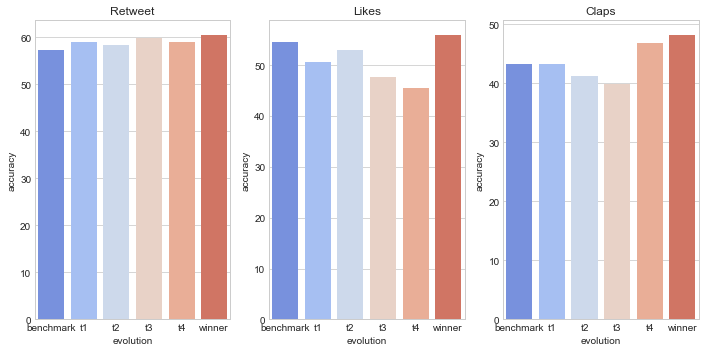

In [296]:
plt.figure(figsize=(10, 5))
for el in columns:
    class_name = el['column_name']
    if class_name != title_length:
        plt.subplot(1, 3, columns.index(el) + 1)
        plt.tight_layout()
        plt.title(class_name);
        values = info[class_name]
        sns.barplot(values['evolution'], values['accuracy'])
        #sns.despine()

During the evolution of the metrics, some variables deprecated the accuracy value, but in further steps, it made it grow. The evolution happened in the following steps:

* Benchmark
* t1: Removed outliers
* t2: t1 + Cleaned the words
* t3: t2 + Added TF-IDF
* t4: t3 + Used stopwords
* Winner: t4 + Parameters from the model tuned

## Reflection

In this project, we developed classifiers to understand how many times an article will receive interaction like retweets and likes (both on Twitter) and claps (on Medium). We also presented a list of words that have a high change to impact positively with the readers, when used on the title or the article. We classified and extracted information about the Categories used on Medium that are commonly presented on our top performers. The number of words and length of the title were also discussed and presented an optimal number to increase the success numbers.

Besides the mathematical analysis used to extract important characteristics of the dataset, we also developed and trained models to predict the how an article would perform. To achieve this machine learning project, some features and characteristics were used:

* Bag of words to tokenize the words of the title
* Term Frequency, Inverse Document Frequency (TF-IDF) to translate the frequency of words in the dataset
* Clean the dataset and each title before training the model (remove Twiter users and invalid characters)
* Grid search to search for the best model parameters
* Remove outliers before processing the data
* Test the dataset to discover a good relation between train and test data points
* Test and split the number of like, retweet and claps in ranges
* Use stopwords to remove common terms of the language

Following these steps listed here, this methodology and framework can be used to classify any kind of article and subjects that are created on Medium and shared on Twitter. This solution is not limited by the context either the subject of the articles and can be easily reproduced to other datasets.

The hard part of the project was to reach a higher accuracy than the one found with simple models, it was necessary multiple reiterations and several modifications on the initial assumption. Reaching the 61%, 55% and 49% is not the ideal solution, but it can clearly lead to the creation of a good title.

## Improvement

For future work we can think about some additional improvements: Adding more features to the original dataset making possible to relate more information to the success of the article. For example, we can correlate the words of the title, with trendy words of the month; Bring more data points to train our model, would also increase the accuracy of the solution; and try to use the position of the word on the title to classify its importance.

# Reference

[1] eMarketer Report. (2017). US Time Spent with Media: eMarketer’s Updated Estimates for 2017. Accessed 9 Aug. 2018. Available at: https://www.emarketer.com/Report/US-Time-Spent-with-Media-eMarketers-Updated-Estimates-2017/2002142

[2] Common Sense Media. (2015). The Common Sense Census: Media Use by Tweens and Teens. Accessed 9 Aug. 2018. Available at: https://www.commonsensemedia.org/research/the-common-sense-census-media-use-by-tweens-and-teens

[3] Lindgaard, Gitte & Fernandes, Gary & Dudek, Cathy & M. Brown, Judith. (2006). Attention web designers: You have 50 milliseconds to make a good first impression! Behaviour and Information Technology, 25(2), 115-126. Behaviour & IT. 25. 115-126. 10.1080/01449290500330448

[4] Shearer, E., Gottfried, J. (2017). News use across social media platforms 2017. Accessed 9 Aug. 2018. Available at: http://www.journalism.org/2017/09/07/news-use-across-social-media-platforms-2017/

[5] Lex, Elisabeth, Andreas Juffinger, and Michael Granitzer. ”Objectivity Classication in Online Media.” ResearchGate. Proceedings of the 21st ACM Conference on Hypertext and Hypermedia, 13 June 2010.

[6] Chen, Yimin, Niall J. Conroy, and Victoria L. Rubin. ”Misleading Online Content: Recognizing Clickbait as ”False News”” ResearchGate. ACM WMDD, 9 Nov. 2015.

[7] Glorot, Xavier, Antoine Bordes, and Yoshua Bengio. ”Domain Adaptation for Large-Scale Sentiment Classification: A Deep Learning Approach.” WUSTL. Proceedings of the 28 Th International Conference on Machine Learning, 2011.

[8] N. Abdelhamid, A. Ayesh, F. Thabtah, S. Ahmadi, W. Hadi. MAC: A multiclass associative classification algorithm J. Info. Know. Mgmt. (JIKM), 11 (2) (2012), pp. 125001-1-1250011-10 WorldScinet

[9] I.H. Witten, E. Frank, M.A. Hall. Data Mining: Practical Machine Learning Tools and Techniques. Morgan Kaufmann, Burlington, MA (2011)

[10] Thabtah, S. Hammoud, H. Abdeljaber, Parallel associative classification data mining frameworks based mapreduce, To Appear in Journal of Parallel Processing Letter, March 2015, World Scientific, 2015.

[11] Nahm, U. Y.; Mooney, R. J. Text mining with information extraction. In: AAAI 2002 Spring Symposium on Mining Answers from Texts and Knowledge. Bases. [S.l.: s.n.], 2002. v. 1.

[12] Baeza-Yates, R.; Ribeiro-Neto, B. et al. Modern information retrieval. [S.l.]: ACM press New York, 1999. v. 463.